<a href="https://colab.research.google.com/github/thinkdeepai/reinforcement-learning-training/blob/master/Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Chargement des diverses librairies utiles pour ce notebook 

In [0]:
# chargement de bibliothéques 
"""
instruction specifique pour utiliser matplotlib dans un notebook 
quand on utilise les notebooks Jupyter pour utiliser Matplotlib
"""
%matplotlib inline  
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

## Chargement du jeu de données

In [0]:
df = pd.read_csv("univariate_linear_regression_dataset.csv")

In [0]:
X =  df.iloc[:,0] #selection de la première colonne de notre dataset (indice 0)
Y =  df.iloc[:,1] #selection de la première colonne de notre dataset (indice 1)

### Visualisation du jeu de données

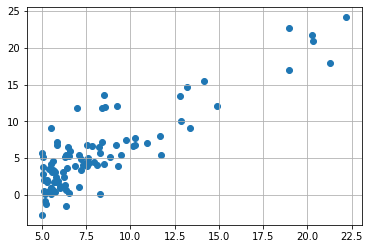

In [16]:
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
plt.show()

### Entrainement d'un modèle de régression linéaire


Note : 

On peut utiliser le module librairie SciPy (Scientific Python) pour implémenter une régression linéaire. Le sous package stats propose la fonction linregress qui calcul une régression à partir d'un jeu de donnée d'entrainement 

In [0]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

### Modèle obtenu

Le fonction de prédiction pour une régression linéaire univariée est comme suit :


\begin{align}
H(x) = intercept + slope * x
\end{align}

avec :
* $slope$ : représente la "pente" de la line de prédiction 
* $intercept$ : représente le point d'intersection avec l'axe des ordonnées


Les coefficients de notre fonction de prédiction ont déjà été calculé et valent : 


In [18]:
slope, intercept

(1.2135472539083585, -4.211504005424089)

Ainsi notre fonction $H(X)$ se décrit comme suit : 

\begin{align}
H(X) = -4.211504005424089 + 1.2135472539083585 * X
\end{align}

note : 
* les valeurs de $slope$ et $intercept$ peuvent variées un peu en fonction des valeurs calculées par la fonction linregress et la précision de nombres flottants.

## Ecriture de la fonction de prédiction avec Python

Vu qu'on dispose de notre fonction des coefficients de notre fonction de prédiction, on peut l'écrire en python.

In [0]:
# définition de quatre observations
def predict(x):
    return slope * x + intercept

## Dessiner la fonction de prédiction (optionnel)

On peut utiliser la fonction de prédiction qu'on vient de définir pour avoir la valeur prédite par la fonction hypothèse pour chacune des observations de notre jeu d'entrainement. Ainsi on pourra voir visuellement à comment la fonction de prédiction "approche" le jeu d'entrainement et qu'elle est par conséquent une bonne fonction de prédiction.

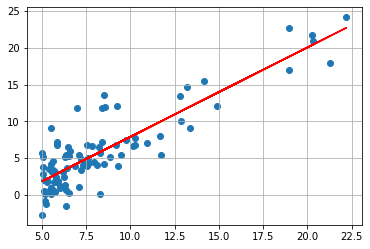

In [20]:
axes = plt.axes()
axes.grid()
plt.scatter(X,Y)
fitLine = predict(X)
plt.plot(X, fitLine, c='r')
plt.show()

## Prédiction d'une nouvelle observation

On voit que pour pour la valeur x = 22.5, la valeur de y pour est environ 25. Utilisons la fonction $predict$ pour trouver une estimation de $H(x = 22.5)$

In [21]:
predict(22.5)

23.093309207513975

Assez proche ! 22.5 $\approx$ 23.09

## Implémentation manuelle Gradient Descent

Par la suite on implémente manuellement l'algorithme de descente de gradient

In [0]:
from __future__ import division
# -*- coding: utf-8 -*-
from numpy import *

import matplotlib.animation as animation

In [0]:
def calculer_cost_function(theta_0, theta_1):
    global_cost  = 0
    for i in range(len(X)):
        cost_i = ((theta_0 + (theta_1 * X[i])) - Y[i]) * ((theta_0 + (theta_1 * X[i])) - Y[i]) 
        global_cost+= cost_i
    return (1/ (2 * len(X))) * global_cost

In [0]:
# a changer par votre chemin de fichier local
df = pd.read_csv("univariate_linear_regression_dataset.csv")

X =  df.iloc[0:len(df),0] # une seule variable prédictive car régression univariée
Y =  df.iloc[0:len(df),1] # valeurs observées (à prédire)

# un tableau pour stocker les valeurs d'erreurs global à chaque tour d'itération
COST_RECORDER = []

# la taille de notre ensemble de données d'apprentissage
M = len(X)

learning_rate_ALPHA = float(0.0001)
initial_theta_0 = float(0)
initial_theta_1 = float(0)
nombre_iterations = 2000

In [0]:
def calculer_derivees_partielles(ancien_theta_0, ancien_theta_1):
    derivee_theta_0 = float(0)
    derivee_theta_1 = float(0)
    for i in range(0, len(X)):
        derivee_theta_0 += float(((ancien_theta_0 + (ancien_theta_1 * X[i])) - float(Y[i])))
        derivee_theta_1 += (((ancien_theta_0 + (ancien_theta_1 * X[i]))) - float(Y[i])) * float(X[i])  
    derivee_theta_0 = (1/M) * derivee_theta_0
    derivee_theta_1 = (1/M) * derivee_theta_1
    return [derivee_theta_0, derivee_theta_1]

In [0]:
def calculer_nouvelles_theta(ancien_theta_0, ancien_theta_1):
    [derivee_theta_0, derivee_theta_1] = calculer_derivees_partielles(ancien_theta_0,ancien_theta_1)
    nouvelle_theta_0 = ancien_theta_0 - (learning_rate_ALPHA * derivee_theta_0)
    nouvelle_theta_1 = ancien_theta_1 - (learning_rate_ALPHA * derivee_theta_1)
    COST_RECORDER.append(calculer_cost_function(nouvelle_theta_0, nouvelle_theta_1))
    return [nouvelle_theta_0,nouvelle_theta_1]

In [0]:
def lancer_gradient_descent():
    tmp_theta_0 = initial_theta_0
    tmp_theta_1 = initial_theta_1   
    for i in range(nombre_iterations):
        [nouvelle_theta_0, nouvelle_theta_1] = calculer_nouvelles_theta(tmp_theta_0, tmp_theta_1)
        tmp_theta_0 = nouvelle_theta_0
        tmp_theta_1 = nouvelle_theta_1
    return [tmp_theta_0, tmp_theta_1] 

In [0]:
[final_theta_0, final_theta_1] = lancer_gradient_descent()

#print COST_RECORDER

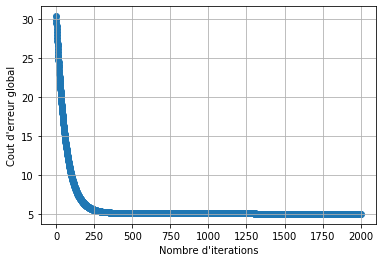

In [12]:
xx = []; yy=[]

#dessiner l'avancer des differents de J(theta_0, theta_1)
for i in range(len(COST_RECORDER)):
   xx.append(i)
   yy.append(COST_RECORDER[i])

axes = plt.axes()
axes.grid()
plt.xlabel('Nombre d\'iterations')
plt.ylabel('Cout d\'erreur global')
plt.scatter(xx,yy)
plt.show()